# Anscombe Quartet Analysis

The Anscombe quartet consists of four datasets that have nearly identical descriptive statistics but look very different when plotted. This notebook demonstrates why visualisation is essential alongside numerical summaries.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load data
df = pd.read_csv('anscombe_quartet.tsv', sep='\t')
datasets = ['I', 'II', 'III', 'IV']
print(df.head(20))

   dataset   x      y
0        I  10   8.04
1        I   8   6.95
2        I  13   7.58
3        I   9   8.81
4        I  11   8.33
5        I  14   9.96
6        I   6   7.24
7        I   4   4.26
8        I  12  10.84
9        I   7   4.82
10       I   5   5.68
11      II  10   9.14
12      II   8   8.14
13      II  13   8.74
14      II   9   8.77
15      II  11   9.26
16      II  14   8.10
17      II   6   6.13
18      II   4   3.10
19      II  12   9.13


## Descriptive Statistics

All four datasets share nearly identical summary statistics.

In [2]:
rows = []
for ds in datasets:
    sub = df[df['dataset'] == ds]
    xs, ys = sub['x'].values, sub['y'].values
    slope, intercept, r, p, se = stats.linregress(xs, ys)
    rows.append({
        'Dataset': ds,
        'n': len(xs),
        'x̄': round(xs.mean(), 4),
        'sx': round(xs.std(ddof=1), 4),
        'ȳ': round(ys.mean(), 4),
        'sy': round(ys.std(ddof=1), 4),
        'slope': round(slope, 4),
        'intercept': round(intercept, 4),
        'R²': round(r**2, 4),
    })

stats_df = pd.DataFrame(rows).set_index('Dataset')
print(stats_df.to_string())

          n   x̄      sx       ȳ      sy   slope  intercept      R²
Dataset                                                            
I        11  9.0  3.3166  7.5009  2.0316  0.5001     3.0001  0.6665
II       11  9.0  3.3166  7.5009  2.0317  0.5000     3.0009  0.6662
III      11  9.0  3.3166  7.5000  2.0304  0.4997     3.0025  0.6663
IV       11  9.0  3.3166  7.5009  2.0306  0.4999     3.0017  0.6667


## Plot 1 — Scatter Plots

Raw (x, y) points for each dataset side by side.

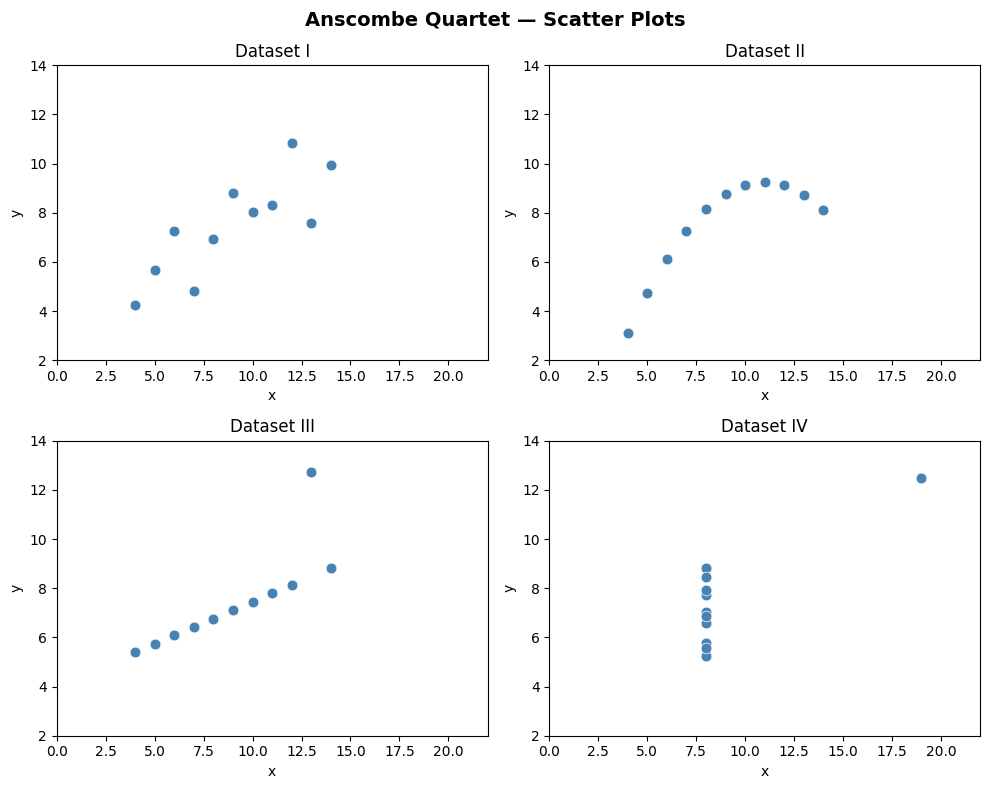

Saved: plot1_scatter.png


In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
fig.suptitle('Anscombe Quartet — Scatter Plots', fontsize=14, fontweight='bold')

for ax, ds in zip(axes.flat, datasets):
    sub = df[df['dataset'] == ds]
    ax.scatter(sub['x'], sub['y'], color='steelblue', s=60, edgecolors='white', linewidths=0.5)
    ax.set_title(f'Dataset {ds}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, 22)
    ax.set_ylim(2, 14)

plt.tight_layout()
plt.savefig('plot1_scatter.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: plot1_scatter.png")

## Plot 2 — Scatter Plots with Regression Lines

The same OLS line fits all four panels despite their very different shapes.

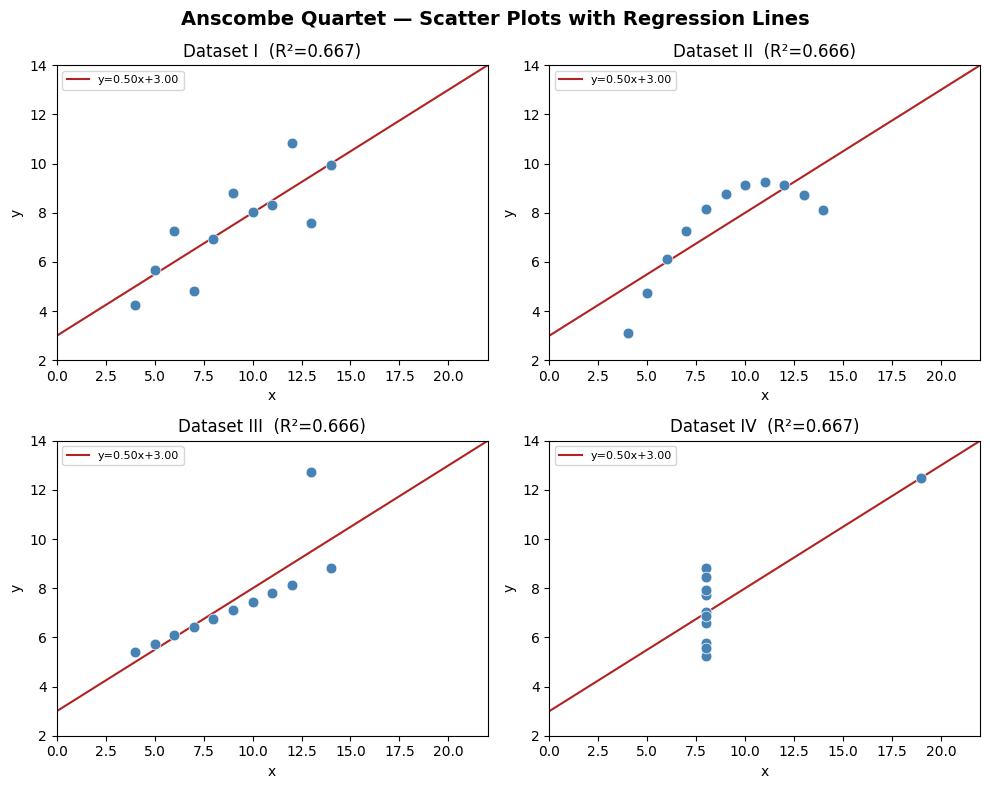

Saved: plot2_regression.png


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Anscombe Quartet — Scatter Plots with Regression Lines', fontsize=14, fontweight='bold')

for ax, ds in zip(axes.flat, datasets):
    sub = df[df['dataset'] == ds]
    xs, ys = sub['x'].values, sub['y'].values
    slope, intercept, r, p, se = stats.linregress(xs, ys)
    x_line = np.linspace(0, 22, 100)
    y_line = slope * x_line + intercept

    ax.scatter(xs, ys, color='steelblue', s=60, edgecolors='white', linewidths=0.5, zorder=3)
    ax.plot(x_line, y_line, color='firebrick', linewidth=1.5, label=f'y={slope:.2f}x+{intercept:.2f}')
    ax.set_title(f'Dataset {ds}  (R²={r**2:.3f})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, 22)
    ax.set_ylim(2, 14)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig('plot2_regression.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: plot2_regression.png")

## Plot 3 — Residual Plots

Residuals (y − ŷ) vs x reveal model mis-specification, outliers, and leverage that the regression line hides.

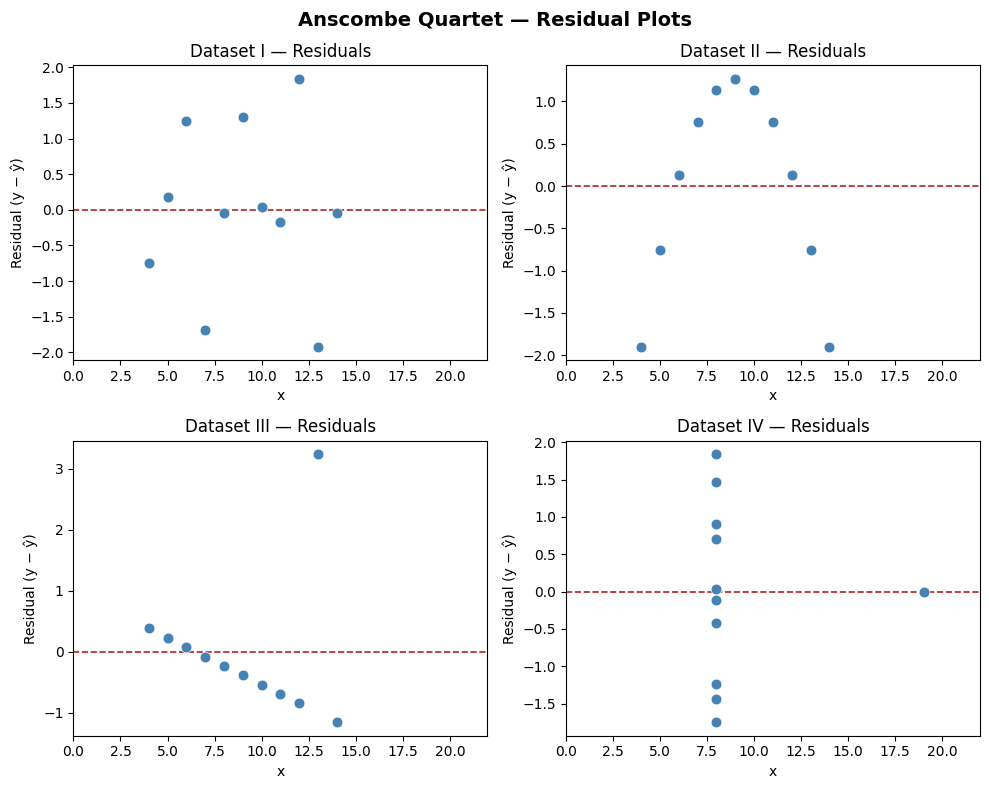

Saved: plot3_residuals.png


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Anscombe Quartet — Residual Plots', fontsize=14, fontweight='bold')

for ax, ds in zip(axes.flat, datasets):
    sub = df[df['dataset'] == ds]
    xs, ys = sub['x'].values, sub['y'].values
    slope, intercept, r, p, se = stats.linregress(xs, ys)
    residuals = ys - (slope * xs + intercept)

    ax.axhline(0, color='firebrick', linewidth=1.2, linestyle='--')
    ax.scatter(xs, residuals, color='steelblue', s=60, edgecolors='white', linewidths=0.5, zorder=3)
    ax.set_title(f'Dataset {ds} — Residuals')
    ax.set_xlabel('x')
    ax.set_ylabel('Residual (y − ŷ)')
    ax.set_xlim(0, 22)

plt.tight_layout()
plt.savefig('plot3_residuals.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: plot3_residuals.png")